Hi everyone! I just finished fastai's practical deep learning for coders and I am in the mood for making a plant image classifier.

If you want to make something like this as well, check [this](http://colab.research.google.com/github/fastai/fastbook/blob/master/02_production.ipynb) notebook(it is actually a more detailed version than the annotations below). If you want a video version, check [this](http://https://course.fast.ai/videos/?lesson=2).

**Note that Kaggle is the platform used since in using Google Colab or Jupyter Notebook, you need to have a Google Cloud account. To have a Google cloud account, the user must have a credit card information.**

# Installing a duckduckgo scraper and importing fastai libraries

In [3]:
pip install jmd_imagescraper;

     |████████████████████████████████| 49 kB 600 kB/s            
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1271 sha256=25cff682d8fac4967afbf0af3f6e86bd0bfe61197981696f5afb6eebc0474bd4
  Stored in directory: /root/.cache/pip/wheels/0a/9e/ba/20e5bbc1afef3a491f0b3bb74d508f99403aabe76eda2167ca
  Created wheel for pathlib: filename=pathlib-1.0.1-py3-none-any.whl size=14363 sha256=3e50c3a2767a78904831f2e922a0c18d776ce583a3518395ca86fbcf4e86b632
  Stored in directory: /root/.cache/pip/wheels/6e/96/b8/10037fe231e23970bac58361d7c93571ab983a7bbc55e68550
Successfully built bs4 pathlib
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install -Uqq fastbook

import fastbook  #import the fast.ai library
from fastbook import *  #dont't worry, it's designed to work with import *
fastbook.setup_book()
from fastai.vision.widgets import *

#import the image scraper by @JoeDockrill, website: https://joedockrill.github.io/blog/2020/09/18/jmd-imagescraper-library/
from jmd_imagescraper.core import * 
from pathlib import Path
from jmd_imagescraper.imagecleaner import *

import ipywidgets as widgets

# Creating a path object that serves as a directory of our scraped images

In [5]:
path = Path().cwd()/"plant"

In [6]:
# Scraping the 200 images of each disease
duckduckgo_search(path, "bacterial spots", "bacterial spots plant", max_results = 200)
duckduckgo_search(path, "mosaic virus", "mosaic virus plant", max_results = 200)
duckduckgo_search(path, "healthy", "healthy plant", max_results = 200)
duckduckgo_search(path, 'rust fungus', 'rust fungus plant', max_results = 200)


Duckduckgo search: bacterial spots plant


Duckduckgo search: mosaic virus plant


Duckduckgo search: healthy plant


Duckduckgo search: rust fungus plant


[Path('/kaggle/working/plant/rust fungus/001_46d53255.jpg'),
 Path('/kaggle/working/plant/rust fungus/002_b9d9ea9d.jpg'),
 Path('/kaggle/working/plant/rust fungus/003_f6db3015.jpg'),
 Path('/kaggle/working/plant/rust fungus/004_086682a7.jpg'),
 Path('/kaggle/working/plant/rust fungus/005_1155689d.jpg'),
 Path('/kaggle/working/plant/rust fungus/006_a0f32b8d.jpg'),
 Path('/kaggle/working/plant/rust fungus/007_4ea942c8.jpg'),
 Path('/kaggle/working/plant/rust fungus/008_766e56ce.jpg'),
 Path('/kaggle/working/plant/rust fungus/009_5b03f7ec.jpg'),
 Path('/kaggle/working/plant/rust fungus/010_c04556ea.jpg'),
 Path('/kaggle/working/plant/rust fungus/011_f7cbe43b.jpg'),
 Path('/kaggle/working/plant/rust fungus/012_46c264eb.jpg'),
 Path('/kaggle/working/plant/rust fungus/013_e6579d3c.jpg'),
 Path('/kaggle/working/plant/rust fungus/014_88f4a771.jpg'),
 Path('/kaggle/working/plant/rust fungus/015_ef5c859c.jpg'),
 Path('/kaggle/working/plant/rust fungus/016_a6f87e51.jpg'),
 Path('/kaggle/working/p

In [7]:
path 

Path('/kaggle/working/plant')

In [8]:
# Downloading and unzipping the images
lst = get_image_files(path)
lst

(#800) [Path('/kaggle/working/plant/healthy/104_a817bffd.jpg'),Path('/kaggle/working/plant/healthy/039_36b4131e.jpg'),Path('/kaggle/working/plant/healthy/095_d811a5d1.jpg'),Path('/kaggle/working/plant/healthy/099_8a48e465.jpg'),Path('/kaggle/working/plant/healthy/092_d3d818a0.jpg'),Path('/kaggle/working/plant/healthy/098_e2f2f1e3.jpg'),Path('/kaggle/working/plant/healthy/023_ec68b122.jpg'),Path('/kaggle/working/plant/healthy/022_1544a89f.jpg'),Path('/kaggle/working/plant/healthy/129_28969775.jpg'),Path('/kaggle/working/plant/healthy/077_793e0b9a.jpg')...]

In [ ]:
# rm -r plant
# uncomment this if you want to delete all of the images you scraped

In [9]:
# Checking the number of images we have
len(lst)

800

In [10]:
# Checking for images with errors
failed = verify_images(lst)
failed

(#0) []

In [11]:
# Removing those images with errors
failed.map(Path.unlink)

(#0) []

# Separating the train and valid data and checking our images

In [12]:
# Separating the test and valid data
plant = DataBlock(
            blocks = (ImageBlock, CategoryBlock),
            get_items = get_image_files,
            splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
            get_y = parent_label,
            item_tfms = Resize(128))

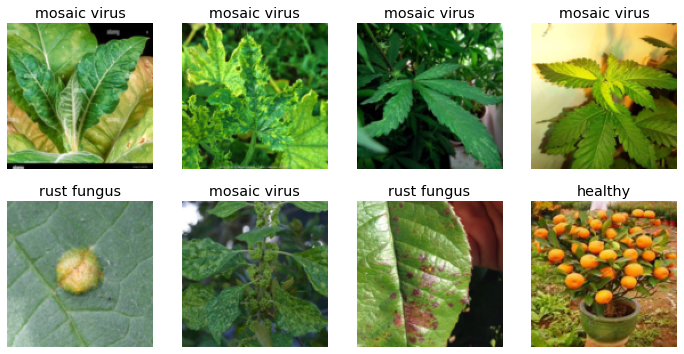

In [13]:
# Checking the images we have and their classifications
dls = plant.dataloaders(path)
dls.valid.show_batch(max_n = 8, nrows = 2)

**Uncomment this if aug_transforms() gives you an error. Apparently, you have to downgrade pytorch in Kaggle.**

More details about that [here](http://www.kaggle.com/product-feedback/279990)

In [ ]:
# pip install --user torch==1.9.0 torchvision==0.10.0 torchaudio==0.9.0 torchtext==0.10.0


/opt/conda/lib/python3.7/site-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


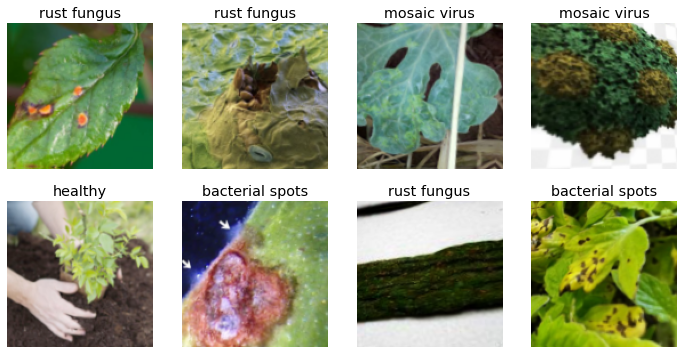

In [14]:
# Performing data augmentation where we create random variations of our input data that they appear 
# different but the meaning does not change.
plant = plant.new(
           item_tfms = RandomResizedCrop(128, min_scale = 0.5),
           batch_tfms = aug_transforms())
dls = plant.dataloaders(path)
dls.train.show_batch(max_n = 8, nrows =2)

# Training Model and Checking the Results

In [15]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Getting the best learning rate so I just won't guess it. I just pick either the slide or valley.
For the details about these four, click [here](http://forums.fast.ai/t/new-lr-finder-output/89236/3)

Click [here](http://sgugger.github.io/how-do-you-find-a-good-learning-rate.html) if you want to gain an intuitive sense of picking a learning rate.

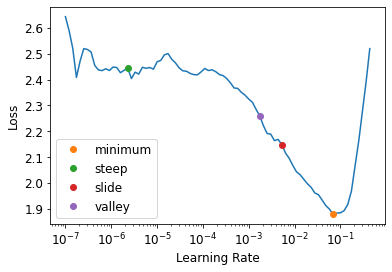

In [16]:
lr_min, lr_steep, lr_slide, lr_valley = learn.lr_find(
    suggest_funcs=(minimum, steep, slide, valley))

In [17]:
print(f" minimum:{lr_min}\n steep:{lr_steep}\n slide:{lr_slide}\n valley:{lr_valley}")

 minimum:0.006918309628963471
 steep:2.2908675418875646e-06
 slide:0.005248074419796467
 valley:0.001737800776027143


In [18]:
learn.fine_tune(5,0.001737800776027143)

epoch,train_loss,valid_loss,error_rate,time
0,2.287030,1.331931,0.475000,00:27


epoch,train_loss,valid_loss,error_rate,time
0,1.650003,1.070387,0.437500,00:39
1,1.459944,1.011088,0.400000,00:40
2,1.322266,1.028208,0.400000,00:37
3,1.192399,1.042041,0.362500,00:36
4,1.109815,1.025670,0.375000,00:36


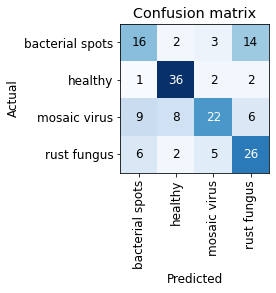

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

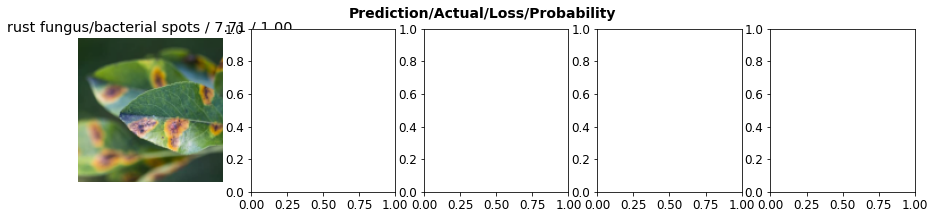

In [20]:
# Plotting the losses, I still don't know why the other 4 images don't show themeselves
interp.plot_top_losses(5, nrows = 1)


In [21]:
# This creates a GUI that shows the images where the model became confused the most. Feel free to
#delete or put in the correct classification the images
cleaner = ImageClassifierCleaner(learn)
cleaner

Uncomment the codes below to apply the changes you performed in the GUI

In [ ]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx, cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

# Exporting the model

In [22]:
learn.export()
path = Path()
path.ls(file_exts = '.pkl')

(#1) [Path('export.pkl')]

# The next step is to use this model in the desired web app or mobile app like Flutter